In [1]:
import pandas as pd
import refinement
import preprocessing
import pickle as pkl

In [2]:
# log_data = pd.read_csv('../resources/input/sample_train.csv')
# train_data, test_data = refinement.refine_log_data(log_data)

with open('./refined_data.pkl', 'rb') as f:
    train_data = pkl.load(f)

In [4]:
question_data = pd.read_csv('../resources/input/questions.csv')
answered_data = pd.read_csv('../resources/input/answered_info.csv')

answered_data = answered_data.rename(columns = {'content_id': 'question_id', 
                                                'answered_count': 'question_answer_count', 
                                                'corrected_count': 'question_correct_count', 
                                                'corrected_ratio': 'question_correct_ratio'})
question_data = pd.merge(question_data, answered_data)

In [5]:
feature_data = preprocessing.derive_question_info(train_data, question_data)

In [6]:
feature_data

,user_id,part,answered_count,correct_count,seen_explanation_count,answer_elapsed_time_mean,answer_elapsed_time_sum,recently_solve_question,recently_correct_answer,solved_question_tag_list,...,total_answered_count,total_correct_count,total_seen_explanation_count,total_answer_elapsed_time_mean,total_answer_elapsed_time_sum,total_recently_solve_question,total_recently_correct_answer,total_solved_question_tag_list,total_correct_rate,total_seen_explanation_rate
0,13134,1,29.0,18.0,29.0,23103.448276,670000.0,1.509097e+10,1.0,"[131, 5, 102, 51, 131, 92, 131, 130, 92, 131, ...",...,345.0,236.0,338.0,21901.373913,7555974.0,1.509124e+10,0.0,"[75, 148, 32, 81, 29, 55, 89, 55, 166, 1, 156,...",68.405797,97.971014
1,13134,2,147.0,106.0,146.0,18680.272109,2746000.0,1.509124e+10,0.0,"[148, 32, 81, 29, 62, 155, 119, 92, 29, 148, 3...",...,345.0,236.0,338.0,21901.373913,7555974.0,1.509124e+10,0.0,"[75, 148, 32, 81, 29, 55, 89, 55, 166, 1, 156,...",68.405797,97.971014
2,13134,3,63.0,43.0,63.0,28349.000000,1785987.0,1.508949e+10,0.0,"[82, 92, 29, 136, 162, 92, 29, 74, 92, 29, 136...",...,345.0,236.0,338.0,21901.373913,7555974.0,1.509124e+10,0.0,"[75, 148, 32, 81, 29, 55, 89, 55, 166, 1, 156,...",68.405797,97.971014
3,13134,4,33.0,21.0,33.0,28575.363636,942987.0,1.508560e+10,1.0,"[74, 144, 162, 92, 136, 144, 162, 92, 157, 144...",...,345.0,236.0,338.0,21901.373913,7555974.0,1.509124e+10,0.0,"[75, 148, 32, 81, 29, 55, 89, 55, 166, 1, 156,...",68.405797,97.971014
4,13134,5,69.0,45.0,63.0,19014.492754,1312000.0,1.508975e+10,0.0,"[75, 55, 89, 55, 166, 1, 156, 47, 167, 53, 179...",...,345.0,236.0,338.0,21901.373913,7555974.0,1.509124e+10,0.0,"[75, 148, 32, 81, 29, 55, 89, 55, 166, 1, 156,...",68.405797,97.971014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194511,2147308237,5,7.0,4.0,1.0,10571.428571,74000.0,6.154810e+05,1.0,"[80, 123, 133, 23, 151, 79, 57]",...,31.0,19.0,1.0,17612.806452,545997.0,6.154810e+05,1.0,"[131, 93, 81, 10, 94, 92, 9, 10, 92, 143, 140,...",61.290323,3.225806
194512,2147308237,6,4.0,2.0,0.0,18000.000000,72000.0,4.212340e+05,1.0,"[65, 96, 27, 73]",...,31.0,19.0,1.0,17612.806452,545997.0,6.154810e+05,1.0,"[131, 93, 81, 10, 94, 92, 9, 10, 92, 143, 140,...",61.290323,3.225806
194513,2147308237,7,4.0,2.0,0.0,37000.000000,148000.0,5.719720e+05,0.0,"[50, 19, 21, 50, 118, 21, 50, 18, 21, 97, 50, 21]",...,31.0,19.0,1.0,17612.806452,545997.0,6.154810e+05,1.0,"[131, 93, 81, 10, 94, 92, 9, 10, 92, 143, 140,...",61.290323,3.225806
194514,2147331033,2,10.0,8.0,10.0,25400.000000,254000.0,2.643062e+10,1.0,"[155, 163, 92, 102, 17, 56, 81, 92, 17, 56, 92...",...,38.0,18.0,27.0,20263.157895,770000.0,2.643102e+10,1.0,"[14, 125, 1, 1, 152, 96, 26, 8, 55, 96, 73, 72...",47.368421,71.052632


In [11]:
test_data = pd.merge(test_data, question_data, left_on = ['content_id'], right_on = ['question_id'])

In [12]:
analysis = pd.merge(test_data, feature_data, on = ['user_id', 'part'])

In [13]:
analysis['time_gap'] = analysis['timestamp'] - analysis['recently_solve_question']
analysis['total_time_gap'] = analysis['timestamp'] - analysis['total_recently_solve_question']

In [23]:
feature_data

,user_id,part,answered_count,correct_count,seen_explanation_count,answer_elapsed_time_mean,answer_elapsed_time_sum,recently_solve_question,recently_correct_answer,correct_rate,seen_explanation_rate,total_answered_count,total_correct_count,total_seen_explanation_count,total_answer_elapsed_time_mean,total_answer_elapsed_time_sum,total_recently_solve_question,total_recently_correct_answer,total_correct_rate,total_seen_explanation_rate
0,13134,1,29.0,18.0,29.0,23103.448276,670000.0,1.509097e+10,1.0,62.068966,100.000000,345.0,236.0,338.0,21901.373913,7555974.0,1.509124e+10,0.0,68.405797,97.971014
1,13134,2,147.0,106.0,146.0,18680.272109,2746000.0,1.509124e+10,0.0,72.108844,99.319728,345.0,236.0,338.0,21901.373913,7555974.0,1.509124e+10,0.0,68.405797,97.971014
2,13134,3,63.0,43.0,63.0,28349.000000,1785987.0,1.508949e+10,0.0,68.253968,100.000000,345.0,236.0,338.0,21901.373913,7555974.0,1.509124e+10,0.0,68.405797,97.971014
3,13134,4,33.0,21.0,33.0,28575.363636,942987.0,1.508560e+10,1.0,63.636364,100.000000,345.0,236.0,338.0,21901.373913,7555974.0,1.509124e+10,0.0,68.405797,97.971014
4,13134,5,69.0,45.0,63.0,19014.492754,1312000.0,1.508975e+10,0.0,65.217391,91.304348,345.0,236.0,338.0,21901.373913,7555974.0,1.509124e+10,0.0,68.405797,97.971014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194511,2147308237,5,7.0,4.0,1.0,10571.428571,74000.0,6.154810e+05,1.0,57.142857,14.285714,31.0,19.0,1.0,17612.806452,545997.0,6.154810e+05,1.0,61.290323,3.225806
194512,2147308237,6,4.0,2.0,0.0,18000.000000,72000.0,4.212340e+05,1.0,50.000000,0.000000,31.0,19.0,1.0,17612.806452,545997.0,6.154810e+05,1.0,61.290323,3.225806
194513,2147308237,7,4.0,2.0,0.0,37000.000000,148000.0,5.719720e+05,0.0,50.000000,0.000000,31.0,19.0,1.0,17612.806452,545997.0,6.154810e+05,1.0,61.290323,3.225806
194514,2147331033,2,10.0,8.0,10.0,25400.000000,254000.0,2.643062e+10,1.0,80.000000,100.000000,38.0,18.0,27.0,20263.157895,770000.0,2.643102e+10,1.0,47.368421,71.052632


In [10]:
from statsmodels.api import add_constant, OLS, Logit

In [29]:
exog_col = ['question_answer_count', 'question_correct_count',
       'question_correct_ratio', 'answered_count', 'correct_count',
       'seen_explanation_count', 'answer_elapsed_time_mean',
       'answer_elapsed_time_sum', 'recently_solve_question',
       'recently_correct_answer', 'correct_rate', 'seen_explanation_rate',
       'total_answered_count', 'total_correct_count',
       'total_seen_explanation_count', 'total_answer_elapsed_time_mean',
       'total_answer_elapsed_time_sum', 'total_recently_solve_question',
       'total_recently_correct_answer', 'total_correct_rate',
       'total_seen_explanation_rate', 'timestamp']
endog_col = ['answered_correctly']

In [40]:
from util import *

In [65]:
import matplotlib.pyplot as plt

In [3]:
test_set = pd.read_csv('../resources/input/example_test.csv')

In [4]:
test_set

,row_id,group_num,timestamp,user_id,content_id,content_type_id,task_container_id,prior_question_elapsed_time,prior_question_had_explanation,prior_group_answers_correct,prior_group_responses
0,0,0,0,275030867,5729,0,0,NaN,NaN,[],[]
1,1,0,13309898705,554169193,12010,0,4427,19000.0,True,NaN,NaN
2,2,0,4213672059,1720860329,457,0,240,17000.0,True,NaN,NaN
3,3,0,62798072960,288641214,13262,0,266,23000.0,True,NaN,NaN
4,4,0,10585422061,1728340777,6119,0,162,72400.0,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99,104,3,13167339284,1900527744,3004,0,1179,24667.0,True,NaN,NaN
100,105,3,13167339284,1900527744,3003,0,1179,24667.0,True,NaN,NaN
101,106,3,64497673060,7792299,7908,0,676,19000.0,True,NaN,NaN
102,107,3,62798166743,288641214,9077,0,269,25000.0,True,NaN,NaN


In [84]:
indicator = ['answered_count', 'correct_count', 'correct_rate',
             'seen_explanation_count', 'seen_explanation_rate', 
             'answer_elapsed_time_mean', 'answer_elapsed_time_sum', 
             'recently_solve_question', 'recently_correct_answer']

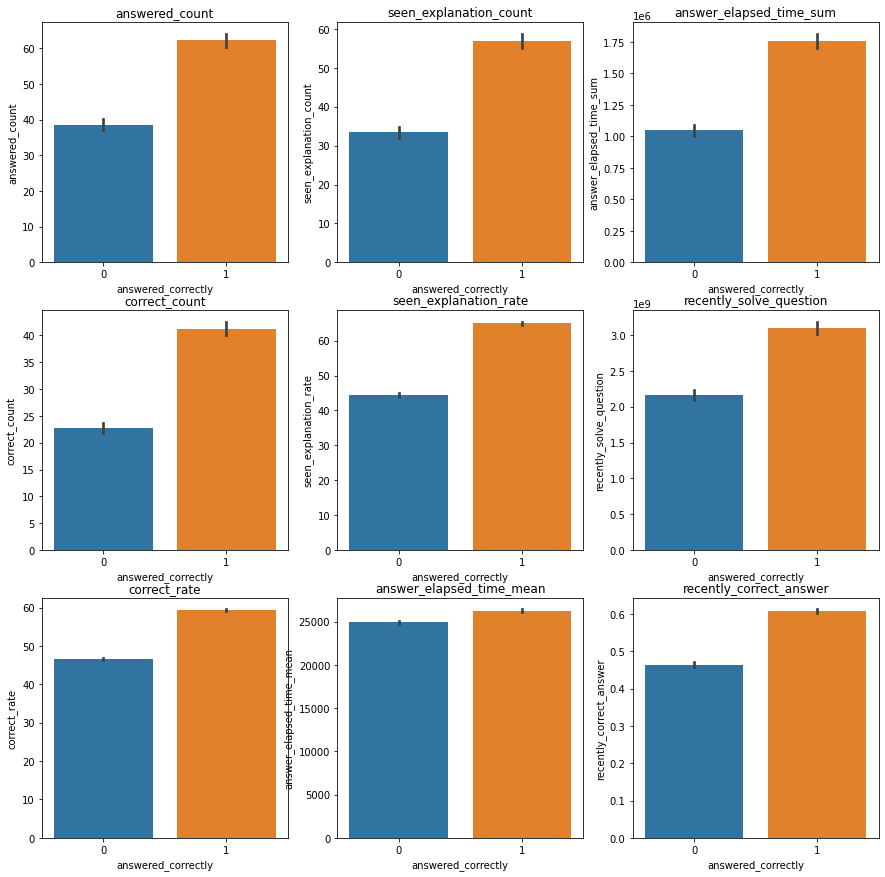

In [87]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for e in range(9):
    x = e % 3
    y = e // 3
    col = indicator[e]
    
    sns.barplot(ax=axes[x][y], x = 'answered_correctly', y = col, data = analysis)
    axes[x][y].set_title(col)

In [88]:
X = add_constant(analysis[exog_col]).join(pd.get_dummies(analysis['part']).drop(columns = [1]))
y = analysis[endog_col]

In [91]:
model = Logit(exog = X, endog = y).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.576083
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     answered_correctly   No. Observations:                61534
Model:                          Logit   Df Residuals:                    61505
Method:                           MLE   Df Model:                           28
Date:                Tue, 05 Jan 2021   Pseudo R-squ.:                  0.1629
Time:                        03:06:34   Log-Likelihood:                -35449.
converged:                       True   LL-Null:                       -42345.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.8394      0.094    -51.566      0.000      -5.023      -4.655
question_answer_count           3.766e-06    4.8e-07      7.851      0.000    2.83e-06    4.71e-06
question_correct_count         -1.648e-06    8.7e-07     -1.895      0.058   -3.35e-06    5.65e-08
question_correct_ratio             5.0517      0.080     63.327      0.000       4.895       5.208
answered_count                    -0.0054      0.002     -2.950      0.003      -0.009      -0.002
correct_count                      0.0044      0.001      4.736      0.000       0.003       0.006
seen_explanation_count             0.0029      0.002      1.664      0.096      -0.001       0.006
answer_elapsed_time_mean       -4.959e-08   1.24e-06     -0.040      0.968   -2.48e-06    2.38e-06
answer_elapsed_time_sum        -2.136e-09   7.86e-09     -0.272      0.786   -1.75e-08    1.33e-08
recently_solve_question        -3.196e-12   5.86e-12     -0.545      0.585   -1.47e-11    8.29e-12
recently_correct_answer            0.0329      0.038      0.869      0.385      -0.041       0.107
correct_rate                       0.0033      0.001      5.121      0.000       0.002       0.005
seen_explanation_rate              0.0015      0.001      2.753      0.006       0.000       0.003
total_answered_count               0.0002      0.001      0.329      0.742      -0.001       0.001
total_correct_count                0.0007      0.000      2.369      0.018       0.000       0.001
total_seen_explanation_count      -0.0008      0.000     -1.558      0.119      -0.002       0.000
total_answer_elapsed_time_mean  2.054e-06   1.69e-06      1.216      0.224   -1.26e-06    5.36e-06
total_answer_elapsed_time_sum    3.63e-09   3.36e-09      1.081      0.280   -2.95e-09    1.02e-08
total_recently_solve_question  -9.994e-12   4.97e-12     -2.012      0.044   -1.97e-11   -2.56e-13
total_recently_correct_answer     -0.0172      0.037     -0.464      0.643      -0.090       0.055
total_correct_rate                 0.0241      0.001     27.626      0.000       0.022       0.026
total_seen_explanation_rate       -0.0014      0.001     -2.354      0.019      -0.002      -0.000
timestamp                       1.174e-11   5.11e-12      2.300      0.021    1.74e-12    2.18e-11
2                                  0.1980      0.050      3.940      0.000       0.099       0.296
3                                  0.2533      0.062      4.105      0.000       0.132       0.374
4                                  0.5498      0.054     10.118      0.000       0.443       0.656
5                                  0.3597      0.048      7.502      0.000       0.266       0.454
6                                  0.2688      0.056      4.836      0.000       0.160       0.378
7                                  0.3611      0.077      4.659      0.000       0.209       0.513
=========================================================================

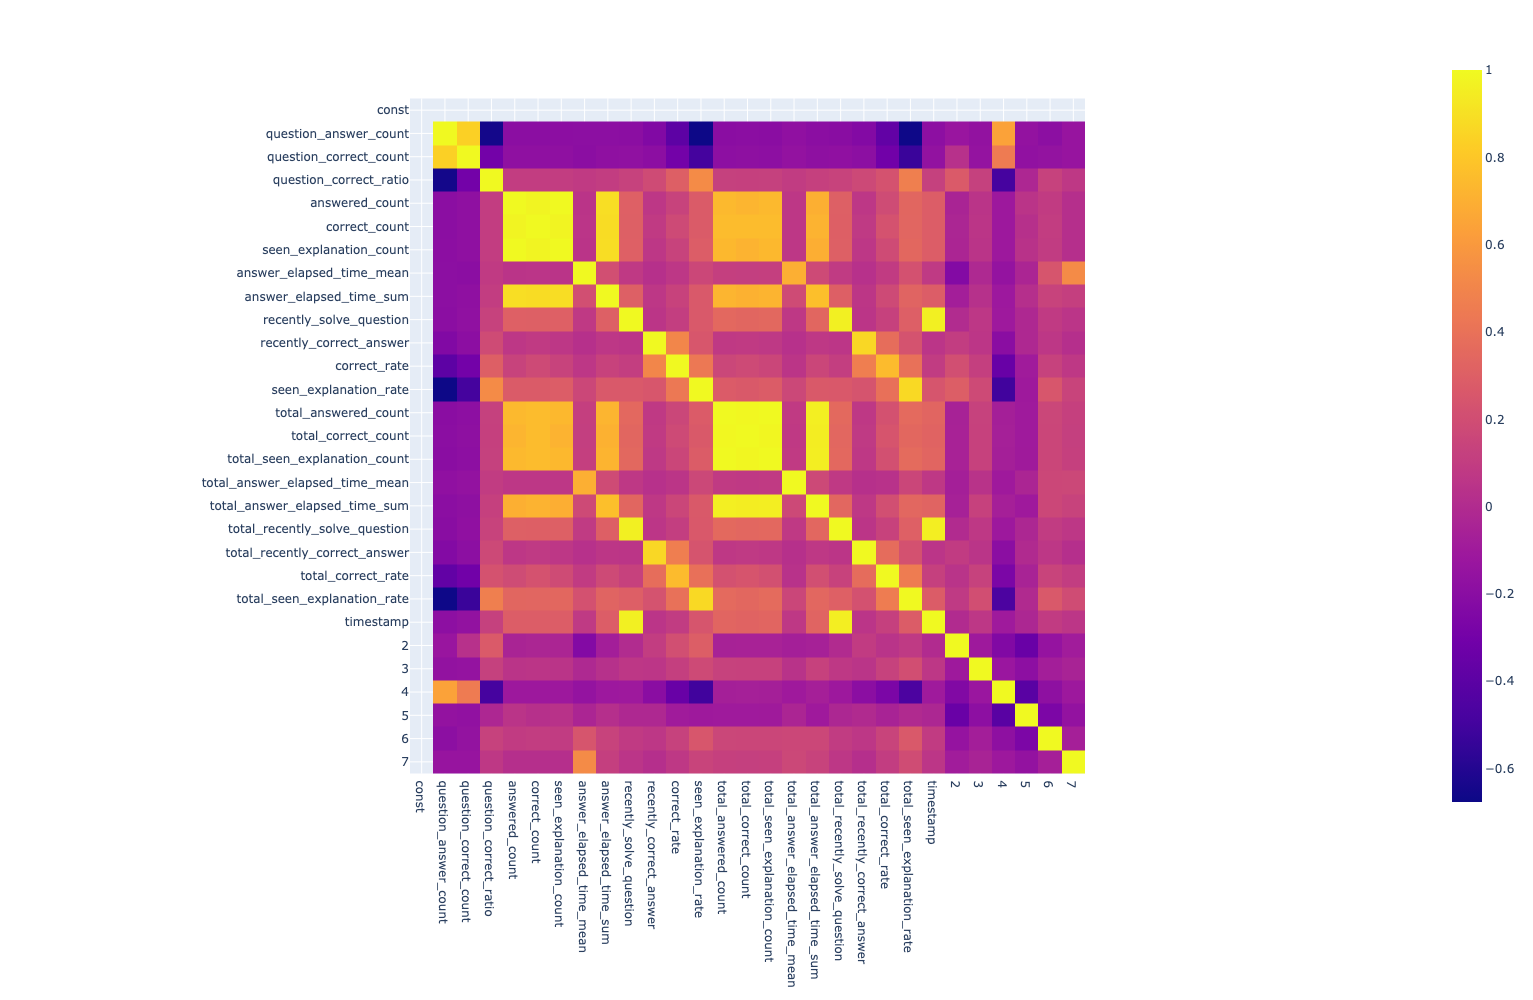

In [33]:
px.imshow(X.corr(), width = 1000, height = 1000)

In [27]:
lecture_data = pd.read_csv('../resources/input/lectures.csv')

In [33]:
lecture_viewed_data = log_data[log_data['content_type_id'] == 1]

In [35]:
lecture_viewed_data = pd.merge(lecture_viewed_data, lecture_data, left_on = ['content_id'], right_on = ['lecture_id'])

In [40]:
user_gp = lecture_viewed_data.groupby(['user_id', 'part', 'type_of'])

In [48]:
type_data = user_gp[['row_id']].count()\
                               .rename(columns = {'row_id': 'type_count'})\
                               .reset_index()

In [63]:
type_data.pivot(columns = ['type_of'], index = ['user_id', 'part'], values = ['type_count'])['type_count']\
         .fillna(0)\
         .reset_index()

type_of,user_id,part,concept,intention,solving question,starter
0,13134,1,1.0,0.0,0.0,0.0
1,13134,2,2.0,1.0,0.0,0.0
2,13134,5,3.0,0.0,0.0,0.0
3,44331,1,1.0,0.0,0.0,0.0
4,44331,6,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...
44189,2146489607,5,5.0,0.0,0.0,0.0
44190,2146621766,2,1.0,1.0,0.0,0.0
44191,2146621766,3,1.0,0.0,0.0,0.0
44192,2146621766,5,17.0,0.0,2.0,0.0


In [55]:
part_data = lecture_viewed_data[['user_id', 'part']].join(pd.get_dummies(lecture_viewed_data['type_of'], prefix = 'type_of'))

In [62]:
part_data.groupby(['user_id', 'part'])[["type_of_concept", "type_of_intention", "type_of_solving question", "type_of_starter"]].sum().reset_index()

,user_id,part,type_of_concept,type_of_intention,type_of_solving question,type_of_starter
0,13134,1,1,0,0,0
1,13134,2,2,1,0,0
2,13134,5,3,0,0,0
3,44331,1,1,0,0,0
4,44331,6,2,0,0,0
...,...,...,...,...,...,...
44189,2146489607,5,5,0,0,0
44190,2146621766,2,1,1,0,0
44191,2146621766,3,1,0,0,0
44192,2146621766,5,17,0,2,0
